In [1]:
from pathlib import Path
import numpy as np 
from PIL import Image

import pandas as pd
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import utils
sns.set(style="whitegrid")

In [2]:
csv_path = '/Users/djohnson/sciebo/Human-Centric XAI AG/1. Projects/XAI for AI-Assisted Decision Making/1. Research/study1_results/results-survey_comb_preprocessed.csv'
df_demo = pd.read_csv(csv_path, sep=';')

In [49]:
ml_know_cols = ['ML 1: Difference', 'ML 2: Data', 'ML 3: Datasets', 'ML 4: Overfit', 'ML 5: Dev']
ml_know_code_cols = [c + ' - numeric' for c in ml_know_cols]

prop_trust_cols = ['Trust 1: Usually Turst', 'Trust 2: Distrust', 'Trust 3: Rely', 
                   'Trust 4: Tend. Trust','Trust 5: Easy Trust', 'Trust 6: Knowledge']
prop_trust_code_cols = [c + ' - numeric' for c in prop_trust_cols]

reflect_cols = ['Reflect 1: Interesting', 'Reeflect 2: Important',
       'Reflect 3: Diff. w/o AI', 'Reflect 4: Diff. w/ AI',
       'Reflect 5: Preference']
reflect_code_cols = [c + ' - numeric' for c in reflect_cols]

ai_trust_cols = ['Trust AI 1: Confidence', 'Trust AI 2: Predictable', 
                 'Trust AI 3: Reliable', 'Trust AI 4: Safe', 'Trust AI 5: Efficient',
                 'Trust AI 6: Wary', 'Trust AI 7: Better', 'Trust AI 8: Like']
ai_trust_code_cols = [c + ' - numeric' for c in ai_trust_cols]

In [50]:
for col_name in ml_know_cols + prop_trust_cols + ai_trust_cols + reflect_cols:
    df_demo[col_name + ' - numeric'] = pd.Categorical(df_demo[col_name], categories=[
    'I strongly disagree', 'I somewhat disagree', 'I am neutral', 'I somewhat agree', 'I strongly agree'], ordered=True).codes + 1

# update negative questions
opts_rev = ['I strongly disagree', 'I somewhat disagree', 'I am neutral', 'I somewhat agree', 'I strongly agree']
opts_rev.reverse()
df_demo['Trust 2: Distrust - numeric'] = pd.Categorical(df_demo['Trust 2: Distrust'], categories=opts_rev, ordered=True).codes + 1
df_demo['Trust AI 6: Wary - numeric'] = pd.Categorical(df_demo['Trust AI 6: Wary'], categories=opts_rev, ordered=True).codes + 1

In [51]:
# aggregate the likert scale questions from the 3 scales
df_demo['ML Knowledge'] = df_demo[ml_know_code_cols].mean(axis=1)
df_demo['Propensity to Trust'] = df_demo[prop_trust_code_cols].mean(axis=1)
df_demo['Trust in AI'] = df_demo[ai_trust_code_cols].mean(axis=1)

In [101]:
df_demo.to_csv('demo_preprocessed.csv', index=False)

In [16]:
df_demo.sample(2)

,Prolific ID,Stakes,Response ID,Date submitted,Date started,Date last action,Study ID,Age,Gender,Education,...,Trust AI 2: Predictable - numeric,Trust AI 3: Reliable - numeric,Trust AI 4: Safe - numeric,Trust AI 5: Efficient - numeric,Trust AI 6: Wary - numeric,Trust AI 7: Better - numeric,Trust AI 8: Like - numeric,ML Knowledge,Propensity to Trust,Trust in AI
45,673611863fd0074ae622e633,LOW,61,2025-01-21 19:33:15,2025-01-21 18:20:50,2025-01-21 19:33:15,678f6356b3ef4faa47a92ef4,56,Female,"Doctoral degree (e.g., PhD, EdD, or equivalent)",...,1,5,5,5,3,5,5,5.0,5.000000,4.250
26,6176b584db27cdcecc3896c8,HIGH,65,2025-01-21 21:34:51,2025-01-21 20:40:34,2025-01-21 21:34:51,678f63e240fa98f8b965a7fc,29,Male,"Bachelor’s degree (e.g., BA, BSc, or equivalent)",...,4,4,4,5,2,5,4,4.0,4.666667,4.125


## Demographics

In [53]:
df_demo.groupby(['Stakes']).count()

,Prolific ID,Response ID,Date submitted,Date started,Date last action,Study ID,Age,Gender,Education,Background,...,ML 2: Data - numeric,ML 3: Datasets - numeric,ML 4: Overfit - numeric,ML 5: Dev - numeric,Trust 1: Usually Turst - numeric,Trust 2: Distrust - numeric,Trust 3: Rely - numeric,Trust 4: Tend. Trust - numeric,Trust 5: Easy Trust - numeric,Trust 6: Knowledge - numeric
Stakes,,,,,,,,,,,,,,,,,,,,,
HIGH,28,28,28,28,28,28,28,28,28,27,...,28,28,28,28,28,28,28,28,28,28
LOW,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24


In [9]:
df_demo.groupby(['Stakes'])['Age'].median()

Stakes
HIGH    36.0
LOW     31.0
Name: Age, dtype: float64

In [13]:
# Group by condition and count gender occurrences
gender_counts_by_condition = df_demo.groupby('Stakes')['Gender'].value_counts()

# Calculate percentages within each condition
gender_percentages_by_condition = (
    df_demo.groupby('Stakes')['Gender']
    .value_counts(normalize=True)
    .mul(100)  # Convert to percentage
    .rename('Percentage')
)

# Combine counts and percentages into a single DataFrame
proportions_by_condition = pd.DataFrame({
    'Count': gender_counts_by_condition,
    'Percentage': gender_percentages_by_condition
}).reset_index()

print(proportions_by_condition)

  Stakes      Gender  Count  Percentage
0   HIGH        Male     14   50.000000
1   HIGH      Female     13   46.428571
2   HIGH  Non-binary      1    3.571429
3    LOW        Male     12   50.000000
4    LOW      Female     10   41.666667
5    LOW  Non-binary      2    8.333333


In [16]:
# Group by condition and count gender occurrences
gender_counts_by_condition = df_demo.groupby('Stakes')['Education'].value_counts()

# Calculate percentages within each condition
gender_percentages_by_condition = (
    df_demo.groupby('Stakes')['Education']
    .value_counts(normalize=True)
    .mul(100)  # Convert to percentage
    .rename('Percentage')
)

# Combine counts and percentages into a single DataFrame
proportions_by_condition = pd.DataFrame({
    'Count': gender_counts_by_condition,
    'Percentage': gender_percentages_by_condition
}).reset_index()

print(proportions_by_condition)

   Stakes                                          Education  Count  \
0    HIGH   Bachelor’s degree (e.g., BA, BSc, or equivalent)     14   
1    HIGH  Secondary education (e.g., High school diploma...      6   
2    HIGH  Master’s degree (e.g., MA, MSc, MBA, or equiva...      5   
3    HIGH  Associate’s degree (e.g., 2-year college degre...      1   
4    HIGH    Doctoral degree (e.g., PhD, EdD, or equivalent)      1   
5    HIGH  Professional degree (e.g., JD, MD, DDS, or equ...      1   
6     LOW   Bachelor’s degree (e.g., BA, BSc, or equivalent)      8   
7     LOW  Master’s degree (e.g., MA, MSc, MBA, or equiva...      5   
8     LOW  Associate’s degree (e.g., 2-year college degre...      3   
9     LOW  Some college or university (e.g., Completed so...      3   
10    LOW    Doctoral degree (e.g., PhD, EdD, or equivalent)      2   
11    LOW  Secondary education (e.g., High school diploma...      2   
12    LOW  Some postgraduate education (e.g., Coursework ...      1   

    P

In [41]:
df_demo[ml_know_code_cols + ['Stakes']].groupby(['Stakes']).mean().mean(axis=1)

Stakes
HIGH    3.478571
LOW     3.883333
dtype: float64

In [19]:
df_demo[prop_trust_code_cols + ['Stakes']].groupby(['Stakes']).mean().mean(axis=1)

Stakes
HIGH    3.958333
LOW     3.743056
dtype: float64

In [21]:
df_demo[ai_trust_code_cols + ['Stakes']].groupby(['Stakes']).mean().mean(axis=1)

Stakes
HIGH    3.383929
LOW     3.411458
dtype: float64

In [23]:
df_demo[['ML Knowledge', 'Propensity to Trust', 'Trust in AI', 'Stakes']].groupby(['Stakes']).aggregate(['mean', 'std'])

ML Knowledge           Propensity to Trust           Trust in AI  \
               mean       std                mean       std        mean   
Stakes                                                                    
HIGH       3.478571  0.998279            3.958333  0.777282    3.383929   
LOW        3.883333  0.922976            3.743056  0.903535    3.411458   

                  
             std  
Stakes            
HIGH    0.455075  
LOW     0.773613

## Stats Analysis

In [29]:
from scipy.stats import mannwhitneyu, wilcoxon, shapiro, ttest_ind, ttest_rel, levene

In [54]:
df_demo.columns

Index(['Prolific ID', 'Stakes', 'Response ID', 'Date submitted',
       'Date started', 'Date last action', 'Study ID', 'Age', 'Gender',
       'Education', 'Background', 'Trust 1: Usually Turst',
       'Trust 2: Distrust', 'Trust 3: Rely', 'Trust 4: Tend. Trust',
       'Trust 5: Easy Trust', 'Trust 6: Knowledge', 'ML 1: Difference',
       'ML 2: Data', 'ML 3: Datasets', 'ML 4: Overfit', 'ML 5: Dev',
       'Reflect 1: Interesting', 'Reeflect 2: Important',
       'Reflect 3: Diff. w/o AI', 'Reflect 4: Diff. w/ AI',
       'Reflect 5: Preference', 'AI Usage', 'Est. Phase 1 Acc.',
       'Est Phase 2 Acc.', 'Est AI Acc.', 'AI Usage Disc', 'Choosing AI Disc',
       'Trust AI 1: Confidence', 'Trust AI 2: Predictable',
       'Trust AI 3: Reliable', 'Trust AI 4: Safe', 'Trust AI 5: Efficient',
       'Trust AI 6: Wary', 'Trust AI 7: Better', 'Trust AI 8: Like',
       'Task Difficulty', 'Please indicate..  [Comment]', 'Tutorial Prep.',
       'Please indicate..  [Comment].1', 'Total ti

In [26]:
def run_stats(df, cols, test, design='group'):
    
    df_hs = df[df['Stakes'] == 'HIGH']
    df_ls = df[df['Stakes'] == 'LOW']
    
    for c in cols:
        if design == 'group':
            print(f'####### {c} - Group Design - Independent - {test.__name__} #######')
            stat, p = test(df_hs[c], df_ls[c])
            print(f'Statistic={stat}, p-value={p} -- {"Significant" if p < 0.05 else "Not significant"}')
        elif design == 'paired':
            print(f'####### {c} - Paired Design - Dependent - {test.__name__} #######')
            stat, p = test(df_hs[c+'1'], df_hs[c+'2'])
            print(f'High Stakes - Statistic={stat}, p-value={p} -- {"Significant" if p < 0.05 else "Not significant"}')
            stat, p = test(df_ls[c+'1'], df_ls[c+'2'])
            print(f'Low Stakes - Statistic={stat}, p-value={p} -- {"Significant" if p < 0.05 else "Not significant"}')
        elif design == 'normality':
            print(f'####### {c} - Shapiro-Wilk Test #######')
            stat, p = test(df_hs[c])
            print(f'High Stakes Statistic={stat}, p-value={p} -- {"Normal" if p < 0.05 else "Not normal"}')
            stat, p = test(df_ls[c])
            print(f'Low Stakes Statistic={stat}, p-value={p} -- {"Normal" if p < 0.05 else "Not normal"}')
        print()

In [55]:
cols = ['Trust in AI', 'Est. Phase 1 Acc.', 'Est Phase 2 Acc.', 'Est AI Acc.', 'Reeflect 2: Important - numeric']

ttest_ind_neq = lambda a, b: ttest_ind(a, b, equal_var=False)

In [61]:
run_stats(df_demo, cols, shapiro, design='normality')

####### Trust in AI - Shapiro-Wilk Test #######
High Stakes Statistic=0.9809217842312331, p-value=0.871881453757728 -- Not normal
Low Stakes Statistic=0.9169860459057045, p-value=0.050121371220373065 -- Not normal

####### Est. Phase 1 Acc. - Shapiro-Wilk Test #######
High Stakes Statistic=0.9069808336748104, p-value=0.016734176270362108 -- Normal
Low Stakes Statistic=0.9083330578151427, p-value=0.03245714481893535 -- Normal

####### Est Phase 2 Acc. - Shapiro-Wilk Test #######
High Stakes Statistic=0.9092545204047517, p-value=0.01897153181048771 -- Normal
Low Stakes Statistic=0.8895461224852954, p-value=0.01300758071521512 -- Normal

####### Est AI Acc. - Shapiro-Wilk Test #######
High Stakes Statistic=0.912810881382115, p-value=0.023122058808821615 -- Normal
Low Stakes Statistic=0.9141700841556906, p-value=0.04347638312940112 -- Normal

####### Reeflect 2: Important - numeric - Shapiro-Wilk Test #######
High Stakes Statistic=0.6487154471306316, p-value=5.80441393332338e-07 -- Normal


In [62]:
run_stats(df_demo, cols, levene)

####### Trust in AI - Group Design - Independent - levene #######
Statistic=3.814594504729675, p-value=0.05641591866391967 -- Not significant

####### Est. Phase 1 Acc. - Group Design - Independent - levene #######
Statistic=1.6832517308352732, p-value=0.20044727944862056 -- Not significant

####### Est Phase 2 Acc. - Group Design - Independent - levene #######
Statistic=0.17006857396375505, p-value=0.6818137770026202 -- Not significant

####### Est AI Acc. - Group Design - Independent - levene #######
Statistic=0.4037465530420163, p-value=0.5280581870697867 -- Not significant

####### Reeflect 2: Important - numeric - Group Design - Independent - levene #######
Statistic=2.956318624568985, p-value=0.09172820397267002 -- Not significant



In [63]:
run_stats(df_demo, cols[1:], ttest_ind_neq)

####### Est. Phase 1 Acc. - Group Design - Independent - <lambda> #######
Statistic=0.616588504673708, p-value=0.5408926231907536 -- Not significant

####### Est Phase 2 Acc. - Group Design - Independent - <lambda> #######
Statistic=-0.04026457317636998, p-value=0.9680585742118997 -- Not significant

####### Est AI Acc. - Group Design - Independent - <lambda> #######
Statistic=-0.7388355771752239, p-value=0.46370998511351236 -- Not significant

####### Reeflect 2: Important - numeric - Group Design - Independent - <lambda> #######
Statistic=-1.8143264461210806, p-value=0.07754058777683984 -- Not significant



In [64]:
## Trust in AI
run_stats(df_demo, cols[0:1], mannwhitneyu)

####### Trust in AI - Group Design - Independent - mannwhitneyu #######
Statistic=313.5, p-value=0.6855477662505374 -- Not significant



## Plots

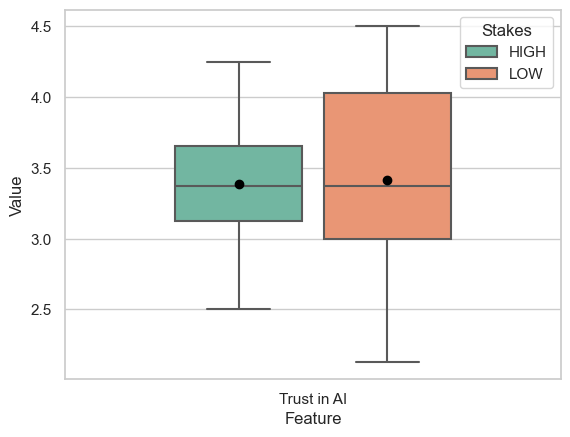

In [65]:
df_tmp = df_demo[cols[0:1] + ['Stakes']]
melted_df = pd.melt(df_tmp, id_vars='Stakes', value_vars=cols[0:1],
                    var_name='Feature', value_name='Value')

box_plot = sns.boxplot(
    data=melted_df, x='Feature', y='Value', hue='Stakes',
    dodge='auto', width=0.6, fliersize=2, linewidth=1.5, palette='Set2', gap=0.15,
    showfliers=False, showmeans=True, meanprops=dict(marker='o', markerfacecolor='black', markeredgecolor='black'),
)

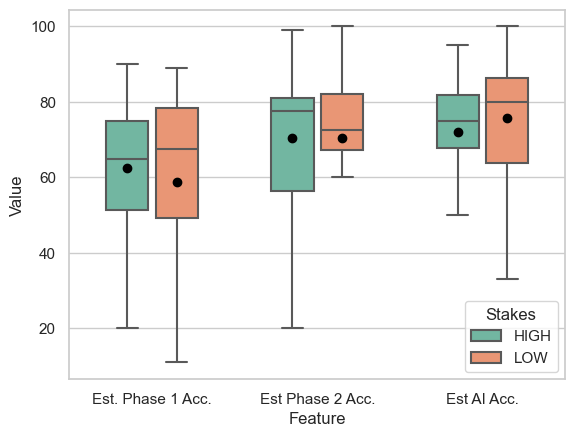

In [68]:
df_tmp = df_demo[cols[1:-1] + ['Stakes']]
melted_df = pd.melt(df_tmp, id_vars='Stakes', value_vars=cols[1:-1],
                    var_name='Feature', value_name='Value')

box_plot = sns.boxplot(
    data=melted_df, x='Feature', y='Value', hue='Stakes',
    dodge='auto', width=0.6, fliersize=2, linewidth=1.5, palette='Set2', gap=0.15,
    showfliers=False, showmeans=True, meanprops=dict(marker='o', markerfacecolor='black', markeredgecolor='black'),
)

(1.0, 6.0)

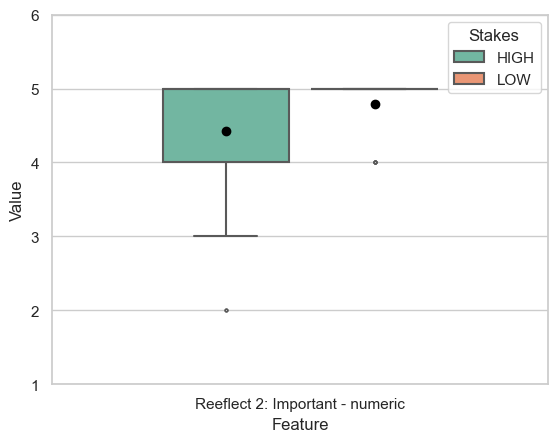

In [97]:
df_tmp = df_demo[cols[-1:] + ['Stakes']]
melted_df = pd.melt(df_tmp, id_vars='Stakes', value_vars=cols[-1:],
                    var_name='Feature', value_name='Value')

box_plot = sns.boxplot(
    data=melted_df, x='Feature', y='Value', hue='Stakes',
    dodge='auto', width=0.6, fliersize=2, linewidth=1.5, palette='Set2', gap=0.15,
    showfliers=True, showmeans=True, meanprops=dict(marker='o', markerfacecolor='black', markeredgecolor='black'),
)
plt.ylim(1, 6)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Trust AI 1: Confidence - numeric'),
  Text(1, 0, 'Trust AI 2: Predictable - numeric'),
  Text(2, 0, 'Trust AI 3: Reliable - numeric'),
  Text(3, 0, 'Trust AI 4: Safe - numeric'),
  Text(4, 0, 'Trust AI 5: Efficient - numeric'),
  Text(5, 0, 'Trust AI 6: Wary - numeric'),
  Text(6, 0, 'Trust AI 7: Better - numeric'),
  Text(7, 0, 'Trust AI 8: Like - numeric')])

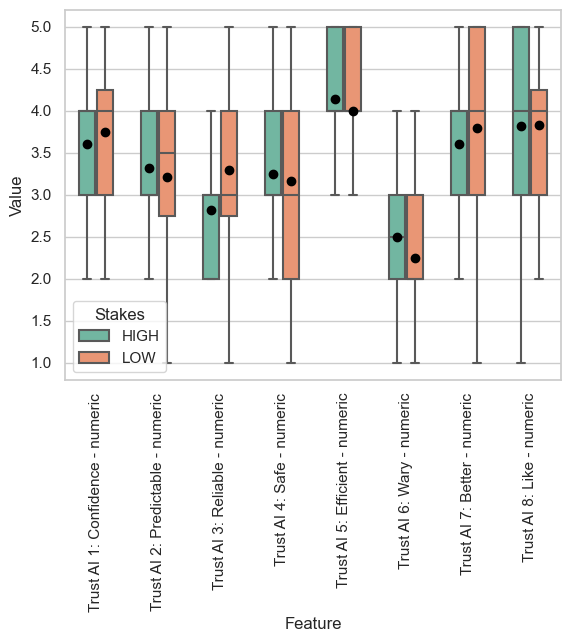

In [85]:
df_tmp = df_demo[ai_trust_code_cols + ['Stakes']]
melted_df = pd.melt(df_tmp, id_vars='Stakes', value_vars=ai_trust_code_cols,
                    var_name='Feature', value_name='Value')

box_plot = sns.boxplot(
    data=melted_df, x='Feature', y='Value', hue='Stakes',
    dodge='auto', width=0.6, fliersize=2, linewidth=1.5, palette='Set2', gap=0.15,
    showfliers=False, showmeans=True, meanprops=dict(marker='o', markerfacecolor='black', markeredgecolor='black'),
)
plt.xticks(rotation=90)

In [89]:
run_stats(df_demo, ai_trust_code_cols, ttest_ind_neq, design='group')

####### Trust AI 1: Confidence - numeric - Group Design - Independent - <lambda> #######
Statistic=-0.5114930609533661, p-value=0.6114756421074337 -- Not significant

####### Trust AI 2: Predictable - numeric - Group Design - Independent - <lambda> #######
Statistic=0.4087477221303782, p-value=0.6850844934752189 -- Not significant

####### Trust AI 3: Reliable - numeric - Group Design - Independent - <lambda> #######
Statistic=-1.5916829226327085, p-value=0.11954215202546264 -- Not significant

####### Trust AI 4: Safe - numeric - Group Design - Independent - <lambda> #######
Statistic=0.2731201101980498, p-value=0.7862063032543226 -- Not significant

####### Trust AI 5: Efficient - numeric - Group Design - Independent - <lambda> #######
Statistic=0.5951464895933527, p-value=0.5550074136190984 -- Not significant

####### Trust AI 6: Wary - numeric - Group Design - Independent - <lambda> #######
Statistic=0.9481926420580089, p-value=0.348173440401658 -- Not significant

####### Trust AI

In [82]:
melted_df.groupby(['Stakes', 'Feature']).median()

,,Value
Stakes,Feature,
HIGH,Reeflect 2: Important - numeric,5.0
LOW,Reeflect 2: Important - numeric,5.0


In [83]:
# Group by condition and count gender occurrences
gender_counts_by_condition = df_demo.groupby('Stakes')['AI Usage'].value_counts()

# Calculate percentages within each condition
gender_percentages_by_condition = (
    df_demo.groupby('Stakes')['AI Usage']
    .value_counts(normalize=True)
    .mul(100)  # Convert to percentage
    .rename('Percentage')
)

# Combine counts and percentages into a single DataFrame
proportions_by_condition = pd.DataFrame({
    'Count': gender_counts_by_condition,
    'Percentage': gender_percentages_by_condition
}).reset_index()

print(proportions_by_condition)

  Stakes                                           AI Usage  Count  Percentage
0   HIGH  I first looked at the AI’s suggestion and then...     13   46.428571
1   HIGH  I first completed the task myself and then ver...     12   42.857143
2   HIGH  I did not use the AI and completed the task by...      3   10.714286
3    LOW  I first completed the task myself and then ver...     10   41.666667
4    LOW  I first looked at the AI’s suggestion and then...      8   33.333333
5    LOW  I did not use the AI and completed the task by...      6   25.000000
